In [ ]:
!pip install lightkurve

     |████████████████████████████████| 245 kB 12.2 MB/s 
     |████████████████████████████████| 98 kB 6.9 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 41 kB 159 kB/s 
     |████████████████████████████████| 4.4 MB 64.4 MB/s 
     |████████████████████████████████| 802 kB 47.4 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 3.2 MB 38.7 MB/s 
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11376 sha256=29e164944fc223d4c41e2e252530bdbc1bd9d1c69491fd2e91f846b7a370675d
  Stored in directory: /root/.cache/pip/wheels/93/08/0c/1b9866c35c8d3f136d100dfe88036a32e0795437daca089f70
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50466 sha256=48e8b30004fb988e1bccf7034078c371369533aa2510492d6c5afef4cecdfb33
  Stored in directory: /root/.cache/pip/wheels/38/f7/65/161985e7311dd484a23b3a5c9149995dbf11db6cede602e7ef
  Created wheel for ok

**Searching for Light Curves**

In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt

In [ ]:
search_result = lk.search_lightcurve('KIC 3733346', author='Kepler')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr003733346,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr003733346,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr003733346,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr003733346,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr003733346,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr003733346,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr003733346,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr003733346,0.0


In [ ]:
search_result[0]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr003733346,0.0


In [ ]:
for column in search_result.table.columns:
  print(column)

dataproduct_type
calib_level
obs_collection
obs_id
target_name
s_ra
s_dec
t_min
t_max
t_exptime
wavelength_region
filters
em_min
em_max
target_classification
obs_title
t_obs_release
instrument_name
proposal_pi
proposal_id
proposal_type
project
sequence_number
provenance_name
s_region
jpegURL
dataURL
dataRights
mtFlag
srcDen
intentType
obsid
objID
exptime
distance
obsID
obs_collection_products
dataproduct_type_products
description
type
dataURI
productType
productGroupDescription
productSubGroupDescription
productDocumentationURL
project_products
prvversion
proposal_id_products
productFilename
size
parent_obsid
dataRights_products
calib_level_products
author
mission
#
year
sort_order


In [ ]:
import numpy as np
quarter2_index = np.where(search_result.table['mission'] == 'Kepler Quarter 02')[0]
search_result[quarter2_index]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0


In [ ]:
search_result_q2 = lk.search_lightcurve('KIC 3733346', author='Kepler', quarter=2)
search_result_q2

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 02,2009,Kepler,1800,kplr003733346,0.0


In [ ]:
lc = search_result_q2.download()
lc

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
169.7659418421681,9.2319516e+04,9.2697735e+00,0,3.263322e-03,781.81123,786.73051,2977,8.9092305e+04,8.8779488e+00,2.0773477e+03,7.0835429e-01,9.2319516e+04,9.2697735e+00,0,nan,nan,nan,nan,781.81123,1.2057812e-04,786.73051,1.4581889e-04,1.0092091e-01,-1.9298431e-01
169.7863760557957,8.9214008e+04,9.1563263e+00,0,3.263836e-03,781.80745,786.73005,2978,8.6126133e+04,8.7672691e+00,2.0793108e+03,7.0831001e-01,8.9214008e+04,9.1563263e+00,0,nan,nan,nan,nan,781.80745,1.2411721e-04,786.73005,1.5003627e-04,1.0036582e-01,-1.9279599e-01
169.80681006918894,8.5608195e+04,9.0206089e+00,0,3.264349e-03,781.80376,786.72918,2979,8.2681344e+04,8.6362791e+00,2.0772085e+03,7.0797533e-01,8.5608195e+04,9.0206089e+00,0,nan,nan,nan,nan,781.80376,1.2850568e-04,786.72918,1.5526263e-04,1.0042009e-01,-1.9289577e-01
169.8272442823436,8.3063625e+04,8.9255180e+00,0,3.264862e-03,781.80081,786.72913,2980,8.0246992e+04,8.5434341e+00,2.0767546e+03,7.0811391e-01,8.3063625e+04,8.9255180e+00,0,nan,nan,nan,nan,781.80081,1.3182692e-04,786.72913,1.5920549e-04,1.0021163e-01,-1.9266903e-01
169.84767829527118,8.4244992e+04,8.9700022e+00,0,3.265375e-03,781.80242,786.72905,2981,8.1373969e+04,8.5879698e+00,2.0805510e+03,7.0775980e-01,8.4244992e+04,8.9700022e+00,0,nan,nan,nan,nan,781.80242,1.3028238e-04,786.72905,1.5737538e-04,1.0010726e-01,-1.9241102e-01
169.86811250773462,9.7360805e+04,9.4567146e+00,0,3.265888e-03,781.81441,786.73210,2982,9.3887734e+04,9.0560179e+00,2.0782170e+03,7.0836788e-01,9.7360805e+04,9.4567146e+00,0,nan,nan,nan,nan,781.81441,1.1529749e-04,786.73210,1.3958653e-04,9.8970458e-02,-1.9224431e-01
169.88854651995644,1.2825345e+05,1.0503614e+01,0,3.266400e-03,781.83651,786.73500,2983,1.2337022e+05,1.0063412e+01,2.0774846e+03,7.0743954e-01,1.2825345e+05,1.0503614e+01,0,nan,nan,nan,nan,781.83651,9.1639682e-05,786.73500,1.1152634e-04,9.9608414e-02,-1.9224758e-01
169.90898063195345,1.5187158e+05,1.1233888e+01,0,3.266912e-03,781.84701,786.73606,2984,1.4590969e+05,1.0766508e+01,2.0792261e+03,7.0833290e-01,1.5187158e+05,1.1233888e+01,0,nan,nan,nan,nan,781.84701,7.9801415e-05,786.73606,9.7487238e-05,9.8825477e-02,-1.9200189e-01


**Downloading a collection of light curves**

In [ ]:
lc_collection = search_result[:5].download_all()
lc_collection

LightCurveCollection of 5 objects:
    0: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=1 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    1: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=2 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    2: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=3 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    3: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=4 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>
    4: <KeplerLightCurve LABEL="KIC 3733346" QUARTER=5 AUTHOR=Kepler FLUX_ORIGIN=pdcsap_flux>

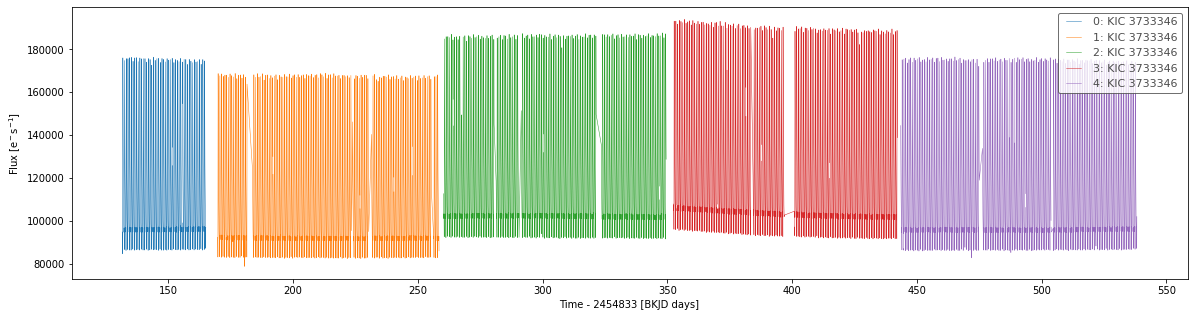

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
lc_collection.plot(ax=ax);

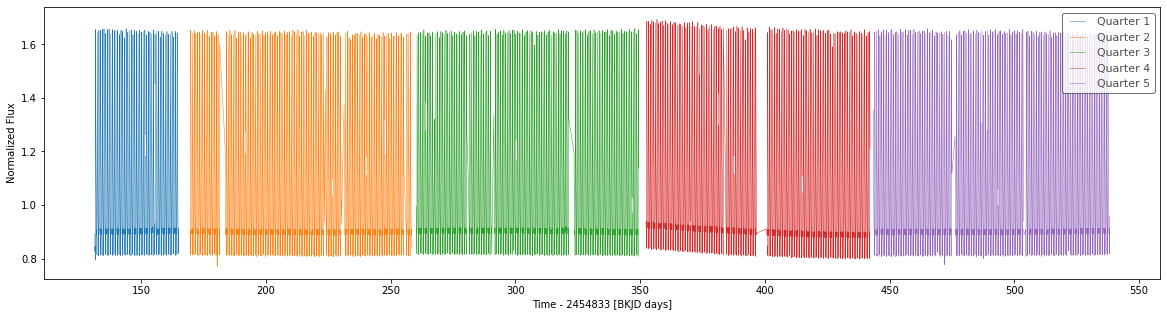

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
for lc in lc_collection:
  lc.normalize().plot(ax=ax, label=f'Quarter {lc.quarter}');

**Searching for Target Pixel Files**

In [ ]:
search_result = lk.search_targetpixelfile('K2-199', exptime=1800)
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 06,2015,K2,1800,ktwo212779596,0.0
1,K2 Campaign 17,2018,K2,1800,ktwo212779596,0.0


In [ ]:
tpf = search_result.download()

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


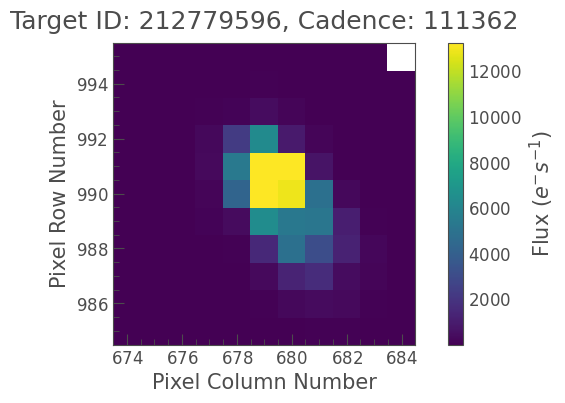

In [ ]:
tpf.plot();

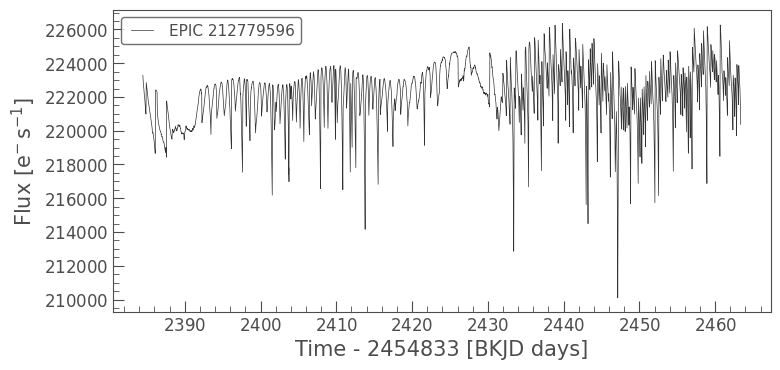

In [ ]:
lc = tpf.to_lightcurve()
lc.plot();

**Downloading a collection of target pixel files**

In [ ]:
tpf_collection = search_result.download_all()
tpf_collection

TargetPixelFileCollection of 2 objects:
    0: KeplerTargetPixelFile Object (ID: 212779596)
    1: KeplerTargetPixelFile Object (ID: 212779596)

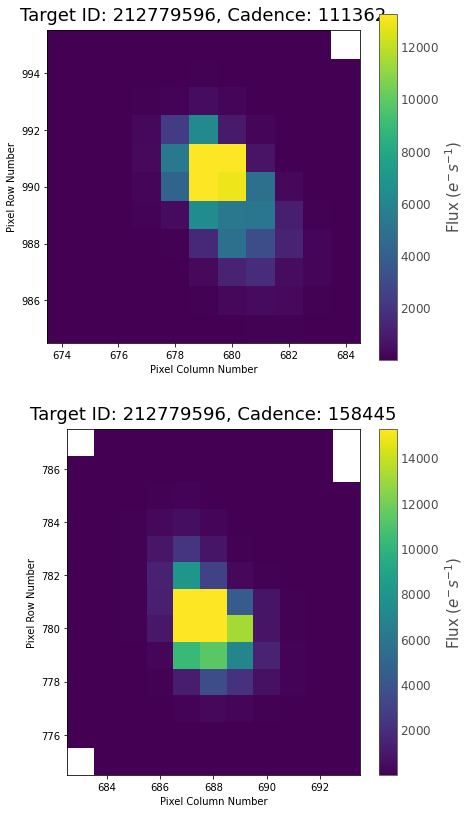

In [ ]:
tpf_collection.plot();

**Searching for TESS Full Frame Image (FFI) Cutouts**

In [ ]:
search_result = lk.search_tesscut('Pi Men')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,TESScut,1426,Pi Men,0.0
1,TESS Sector 04,2018,TESScut,1426,Pi Men,0.0
2,TESS Sector 08,2019,TESScut,1426,Pi Men,0.0
3,TESS Sector 11,2019,TESScut,1426,Pi Men,0.0
4,TESS Sector 12,2019,TESScut,1426,Pi Men,0.0
5,TESS Sector 13,2019,TESScut,1426,Pi Men,0.0
6,TESS Sector 27,2020,TESScut,475,Pi Men,0.0
7,TESS Sector 28,2020,TESScut,475,Pi Men,0.0
8,TESS Sector 31,2020,TESScut,475,Pi Men,0.0


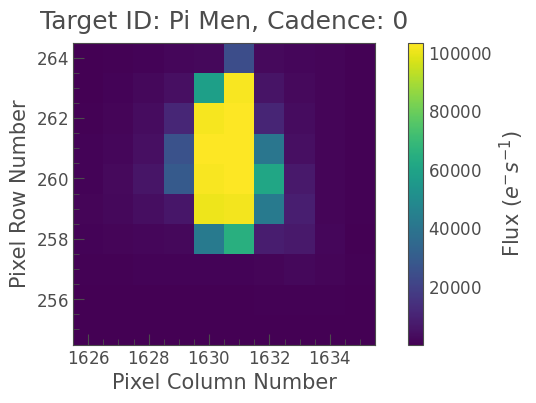

In [ ]:
tpf_cutout = search_result[0].download(cutout_size=10)
tpf_cutout.plot();

**Performing a Cone Search**

In [ ]:
search_result = lk.search_targetpixelfile('Trappist-1', radius=180., campaign=12, exptime=1800)
print(search_result)


SearchResult containing 3 data products.

 #     mission     year author exptime  target_name  distance
                                  s                   arcsec 
--- -------------- ---- ------ ------- ------------- --------
  0 K2 Campaign 12 2016     K2    1800 ktwo246199087      0.0
  1 K2 Campaign 12 2016     K2    1800 ktwo200164267     12.1
  2 K2 Campaign 12 2016     K2    1800 ktwo246199173     95.5


**Citing Lightkurve and Astropy**

In [ ]:
lk.show_citation_instructions()